In [ ]:
############## Sara Ghavampour 9812762781 ######## 

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_2mB-hoxgJQZtsQJ9IutF_hOJSjsa3WS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1_2mB-hoxgJQZtsQJ9IutF_hOJSjsa3WS" -O Lena.bmp && rm -rf /tmp/cookies.txt

--2023-02-06 06:35:23--  https://docs.google.com/uc?export=download&confirm=&id=1_2mB-hoxgJQZtsQJ9IutF_hOJSjsa3WS
Resolving docs.google.com (docs.google.com)... 74.125.23.139, 74.125.23.102, 74.125.23.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t6ci9lj9jtesd1t54l7hk0morb5s9tko/1675665300000/01865608280713457520/*/1_2mB-hoxgJQZtsQJ9IutF_hOJSjsa3WS?e=download&uuid=095603ac-781c-45db-8f3f-116ea0023974 [following]
--2023-02-06 06:35:24--  https://doc-0k-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t6ci9lj9jtesd1t54l7hk0morb5s9tko/1675665300000/01865608280713457520/*/1_2mB-hoxgJQZtsQJ9IutF_hOJSjsa3WS?e=download&uuid=095603ac-781c-45db-8f3f-116ea0023974
Resolving doc-0k-64-docs.googleusercontent.com (doc-0k-64-docs.googleusercontent.com)... 108.177.125.132, 2404

In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OcQZOuJLyxVQALtAVWcitmG8yzFAL8eZ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OcQZOuJLyxVQALtAVWcitmG8yzFAL8eZ" -O Baboon.bmp && rm -rf /tmp/cookies.txt

--2023-02-06 06:35:25--  https://docs.google.com/uc?export=download&confirm=&id=1OcQZOuJLyxVQALtAVWcitmG8yzFAL8eZ
Resolving docs.google.com (docs.google.com)... 74.125.23.139, 74.125.23.102, 74.125.23.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5j80pnqspiu2tehuea92fnr3co50cdof/1675665300000/01865608280713457520/*/1OcQZOuJLyxVQALtAVWcitmG8yzFAL8eZ?e=download&uuid=870b98a7-cea2-47a2-93e2-ff5eec923c69 [following]
--2023-02-06 06:35:26--  https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5j80pnqspiu2tehuea92fnr3co50cdof/1675665300000/01865608280713457520/*/1OcQZOuJLyxVQALtAVWcitmG8yzFAL8eZ?e=download&uuid=870b98a7-cea2-47a2-93e2-ff5eec923c69
Resolving doc-0c-64-docs.googleusercontent.com (doc-0c-64-docs.googleusercontent.com)... 108.177.125.132, 2404

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
from math import *
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
%matplotlib inline

In [7]:
def show_img(*args, figsize=10, is_gray=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    cmap=None
    if not is_gray:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    else:
        cmap = 'gray'
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        
        plt.imshow(images[i-1], cmap=cmap)
        plt.axis('off')

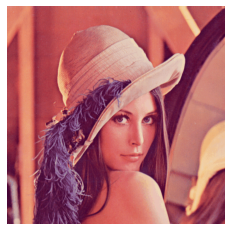

In [8]:
lena_img=cv2.imread('Lena.bmp')
lena_img = cv2.cvtColor(lena_img,cv2.COLOR_BGR2RGB)
plt.imshow(lena_img)
plt.axis('off')
plt.show()
#(512, 512) uint8

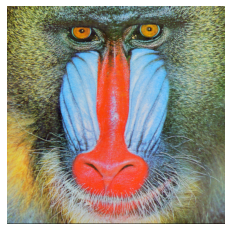

In [9]:
baboon_img=cv2.imread('Baboon.bmp')
baboon_img = cv2.cvtColor(baboon_img,cv2.COLOR_BGR2RGB)
plt.imshow(baboon_img,cmap='gray')
plt.axis('off')
plt.show()
#(512, 512) uint8

In [10]:
def normalize(img):
  min = np.min(img)
  max = np.max(img)
  return ((img-min)/(max-min)*255).astype('uint8')


6.1.1

In [11]:
############## 6.1.1 #########################

In [12]:
def HSI_converter(img):
  red,green,blue = img[:,:,0],img[:,:,1],img[:,:,2]
  # scale rgb between 0-1
  red =  red / 255.0
  green =green / 255.0
  blue =   blue /255.0

  H = np.zeros((img.shape[0],img.shape[1]))
  S = np.zeros((img.shape[0],img.shape[1]))

# theta formula in page 62 of slide 7
  hue_numerator = 1/2 * ((red-green)+(red-blue))
  hue_denumerator = np.sqrt((red-green)**2 + ((red-blue)*(green - blue)))
  hue = np.arccos(hue_numerator / hue_denumerator)
  
  # 2 conditions for  H 
  for i in range (img.shape[0]):
    for j in range(img.shape[1]):
      if hue_denumerator[i,j]  != 0 :
        if blue[i,j]<= green[i,j] : H[i,j]=hue[i,j]
        if blue[i,j]> green[i,j] : H[i,j]=np.pi- hue[i,j] 
      ##################################### 
      ## compute s 
      mean = min(min(red[i,j],green[i,j]),blue[i,j])  
      S[i,j]= 1-(3/(red[i,j]+green[i,j]+blue[i,j]))*mean 

  # compute I
  I = (red + green + blue) / 3 

  H = normalize(H)
  return H,S,I


In [13]:
H_lena,S_lena ,I_lena = HSI_converter(lena_img)

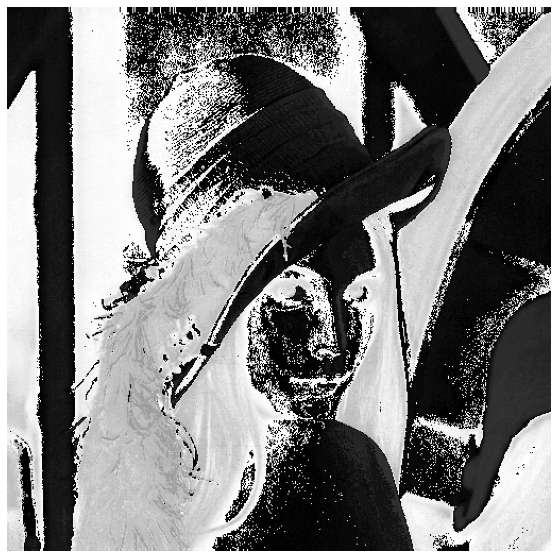

In [14]:
show_img(H_lena)

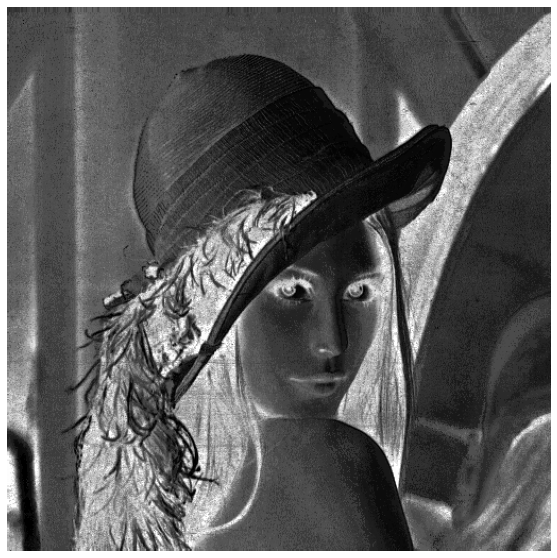

In [15]:
show_img(S_lena)

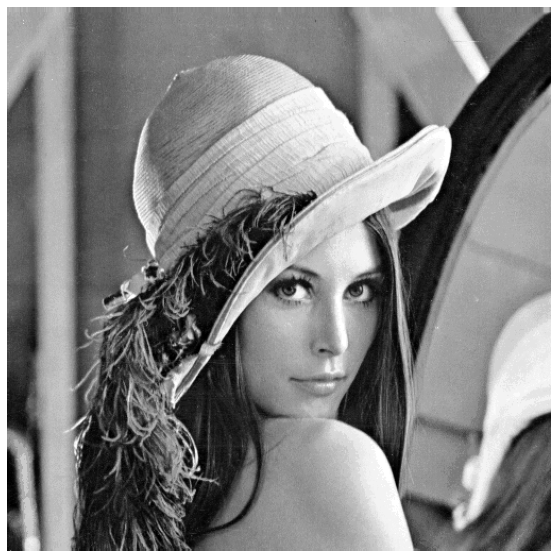

In [16]:
show_img(I_lena)

6.2.1

In [17]:
##################### 6.2.1 ##########

In [43]:
def mse(img1,img2):
  pic_1=img1.copy().ravel().astype('uint8')
  pic_2=img2.copy().ravel().astype('uint8')
  sqr_diff=(pic_1 - pic_2)**2
  size=pic_1.shape[0]
  err = np.sum(sqr_diff) / size
  return err

In [19]:
def Quantize_channel(img,n_final__levels):
  output= np.floor(img / (256/n_final__levels))
  output= output * np.floor(255/(n_final__levels -1 ))
  return output

In [55]:
def Quantize_colored(img,r_level,g_level,b_level):
  r_channel , g_channel , b_channel = img[:,:,0] , img[:,:,1],img[:,:,2]
  # quantise each color channel speratly 
  r_channel = Quantize_channel(r_channel,r_level)
  g_channel = Quantize_channel(g_channel,g_level)
  b_channel = Quantize_channel(b_channel,b_level)

  quantized_img = np.zeros((img.shape))
  quantized_img[:,:,0] = r_channel
  quantized_img[:,:,1] = g_channel
  quantized_img[:,:,2] = b_channel

  quantized_img=quantized_img.astype('uint8')
  
  psnr  = cv2.PSNR(img,quantized_img)

  return quantized_img , mse(img.astype('uint8'),quantized_img) , psnr
  

In [56]:
quantized_lena_8,mse_8,psnr_8 = Quantize_colored(lena_img,8,8,8)
quantized_lena_16,mse_16,psnr_16 = Quantize_colored(lena_img,16,16,16)
quantized_lena_32,mse_32,psnr_32 = Quantize_colored(lena_img,32,32,32)
quantized_lena_64,mse_64,psnr_64 = Quantize_colored(lena_img,64,64,64)


mse_8:  74.54098892211914  psnr_8:  26.114930769898006


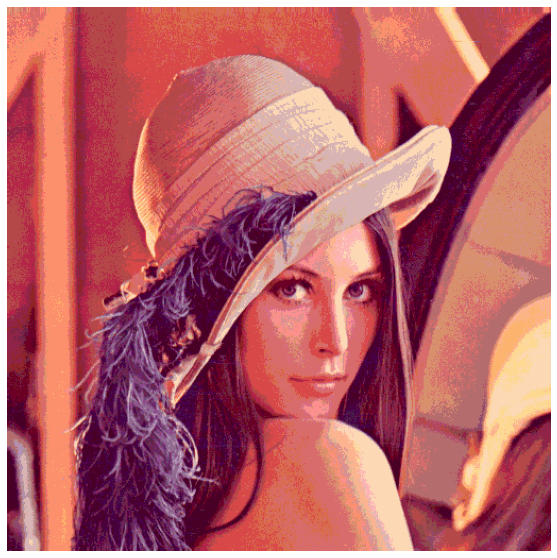

In [58]:
print('mse_8: ',mse_8,' psnr_8: ',psnr_8)
show_img(quantized_lena_8)

mse_16:  31.312630971272785  psnr_16:  33.17360801130215


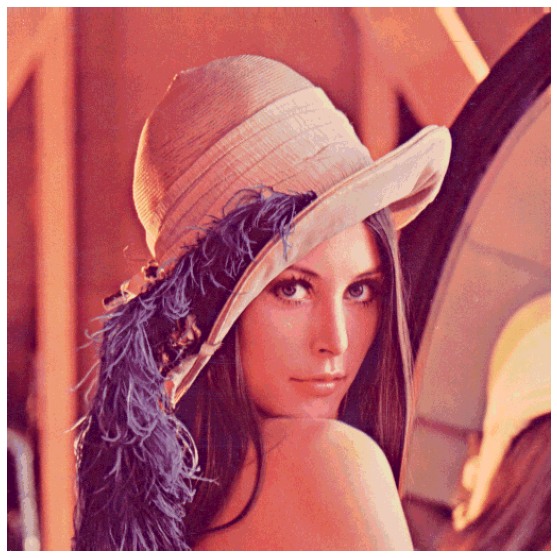

In [59]:
print('mse_16: ',mse_16,' psnr_16: ',psnr_16)
show_img(quantized_lena_16)

mse_32:  13.3230832417806  psnr_32:  36.884756195216674


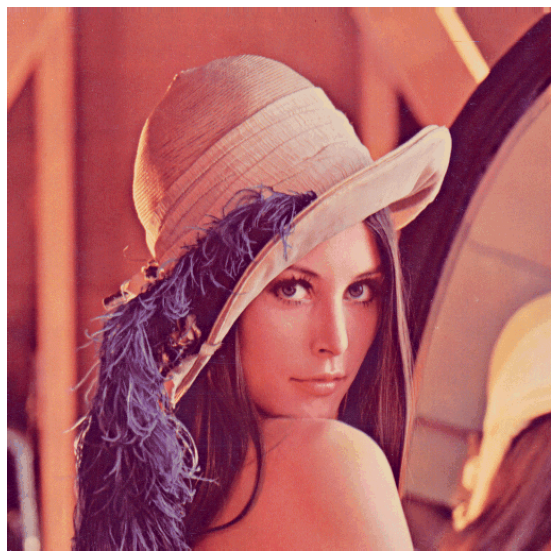

In [60]:
print('mse_32: ',mse_32,' psnr_32: ',psnr_32)
show_img(quantized_lena_32)

mse_64:  1.5570615132649739  psnr_64:  46.20774590725071


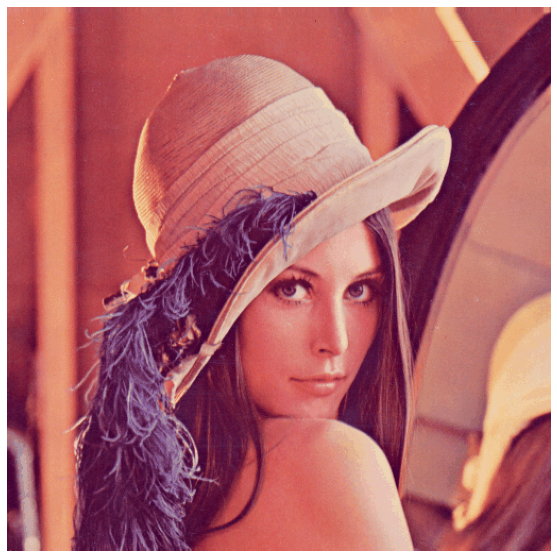

In [61]:
print('mse_64: ',mse_64,' psnr_64: ',psnr_64)
show_img(quantized_lena_64)

6.2.2

In [62]:
################### 6.2.2 #######################

q_622_mse:  75.97438685099284  q_622_psnr:  22.56168693298211


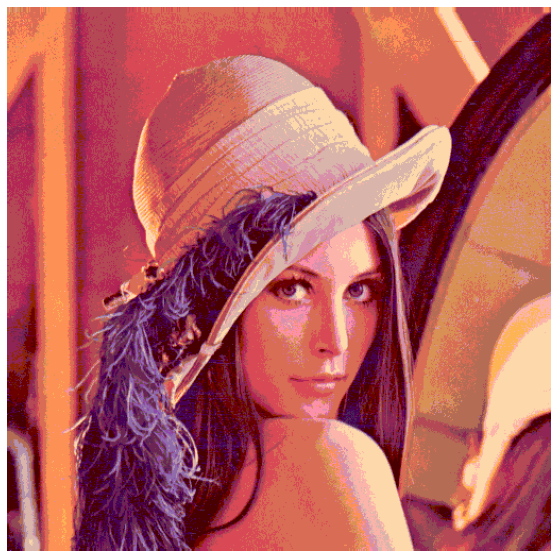

In [63]:
# 3,3,2 bits for r,g,b --> 8,8,4 levels for r,g,b
q_622_img,q_622_mse,q_622_psnr = Quantize_colored(lena_img,8,8,4)
print('q_622_mse: ',q_622_mse,' q_622_psnr: ',q_622_psnr)
show_img(q_622_img)

6.2.3

In [64]:
############## 6.2.3 ####################

In [125]:
def safe_rgb(img,colors_count):
  kmeans = KMeans(colors_count,random_state=0)
  clustered_img = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
  kmeans.fit_predict(clustered_img)

  cluster_centroids = kmeans.cluster_centers_ .astype('uint8')
  labels = kmeans.labels_.reshape(img.shape[0],img.shape[1])

  segmented_pic = np.zeros((img.shape))
  
  for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
      segmented_pic[i,j,:]=cluster_centroids[labels[i,j]].astype('uint8')

    
  return segmented_pic.astype('uint8') , mse(img,segmented_pic.astype('uint8'))

In [128]:
segmented_baboon_8,mse_baboon_8 = safe_rgb(baboon_img,8)
segmented_baboon_16,mse_baboon_16 = safe_rgb(baboon_img,16)
segmented_baboon_32,mse_baboon_32 = safe_rgb(baboon_img,32)


mse_baboon_8 :  86.48012797037761


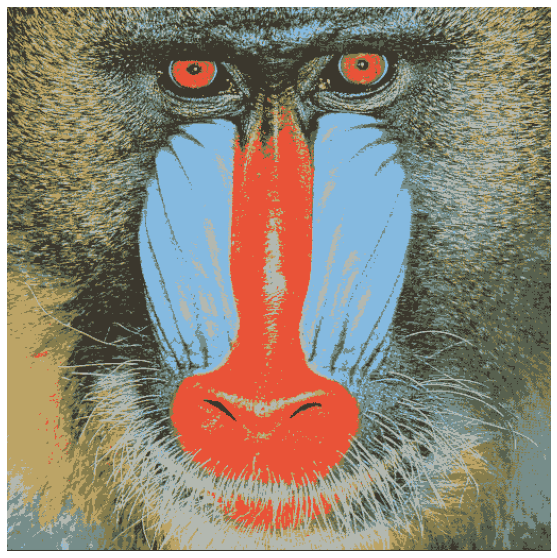

In [127]:
print('mse_baboon_8 : ', mse_baboon_8)
show_img(segmented_baboon_8)

mse_baboon_16 :  77.66013717651367


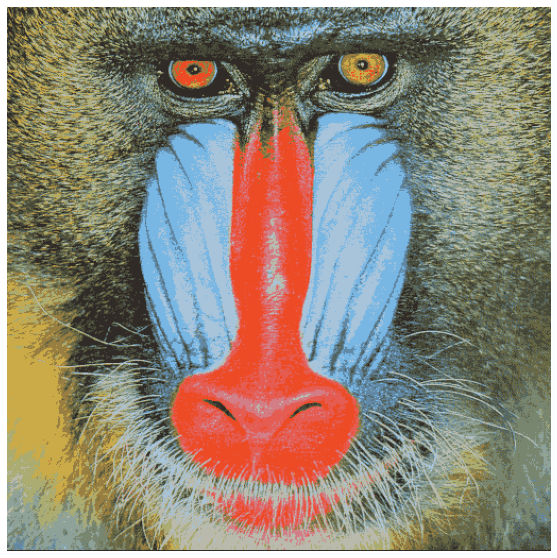

In [129]:
print('mse_baboon_16 : ', mse_baboon_16)
show_img(segmented_baboon_16)

mse_baboon_32 :  66.91930389404297


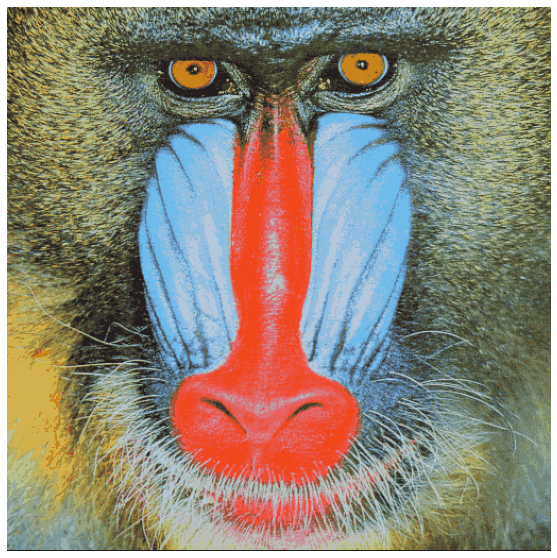

In [130]:
print('mse_baboon_32 : ', mse_baboon_32)
show_img(segmented_baboon_32)

In [ ]:
################# The End of hw6 ########